In [15]:
import tensorflow as tf
import keras
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
import vec
from vec import Vec
from vecutil import vec2list
from sympy import Matrix
# print(tf.test.gpu_device_name())
# print(tf.config.list_physical_devices('GPU'))

In [16]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    return model

In [17]:
def plot_train_vs_validation_loss(history):
    import matplotlib.pyplot as plt
    history_dict = history.history
    loss = history_dict['loss']
    validation_loss = history_dict['val_loss']
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, validation_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def plot_train_vs_validation_accuracy(history):
    import matplotlib.pyplot as plt
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, "bo", label="Training Accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [18]:
# %load efficient_cancer_data.py
# Copyright 2013 Philip N. Klein

def read_training_data(fname, D=None):
    """Given a file in appropriate format, and given a set D of features,
    returns the pair (A, b) consisting of
    a P-by-D matrix A and a P-vector b,
    where P is a set of patient identification integers (IDs).

    For each patient ID p,
      - row p of A is the D-vector describing patient p's tissue sample,
      - entry p of b is +1 if patient p's tissue is malignant, and -1 if it is benign.

    The set D of features must be a subset of the features in the data (see text).
    """
    file = open(fname)
    params = ["radius", "texture", "perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimension"];
    stats = ["(mean)", "(stderr)", "(worst)"]
    feature_labels = set([y+x for x in stats for y in params])
    feature_map = {params[i]+stats[j]:j*len(params)+i for i in range(len(params)) for j in range(len(stats))}
    if D is None: D = feature_labels
    feature_vectors = {}
    #patient_diagnoses = {}
    A = []
    b = []
    for line in file:
        row = line.split(",")
        patient_ID = int(row[0])
        b.append(-1) if row[1] == 'B' else b.append(1)
        feature_vectors[patient_ID] = Vec(D, {f:float(row[feature_map[f]+2]) for f in D})
        A.append(vec2list(feature_vectors[patient_ID]))
    return Matrix(A), Matrix(b)
        

In [19]:
data, labels=read_training_data('train.data')

# replace -1 with 0 in labels for sigmoid preparation
labels = [label if label == 1 else 0 for label in labels]

data = np.array(data).astype(np.float32)
labels = np.array(labels).astype(np.float32)

# standardize data
normed_data = (data - data.mean())/data.std()

In [20]:
train_data = data[:225]
train_labels = labels[:225]

test_data = data[225:]
test_labels = labels[225:]

train_data.shape, train_labels.shape

((225, 30), (225,))

In [21]:
model1 = build_model()

model1.compile(
    loss='binary_crossentropy', optimizer="adam", metrics=['accuracy']
)

history = model1.fit(
    train_data,
    train_labels,
    batch_size=128,
    epochs=3000,
    validation_data=(test_data, test_labels)
)

Epoch 1/3000
1/2 [==============>...............] - ETA: 0s - loss: 2.1546 - accuracy: 0.3750

2022-04-27 14:40:13.145720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 131ms/step - loss: 36.4787 - accuracy: 0.4400 - val_loss: 108.8154 - val_accuracy: 0.3867
Epoch 2/3000
2/2 [==============================] - 0s 23ms/step - loss: 71.5281 - accuracy: 0.5200 - val_loss: 44.4917 - val_accuracy: 0.3867
Epoch 3/3000
2/2 [==============================] - 0s 22ms/step - loss: 20.2789 - accuracy: 0.5333 - val_loss: 48.8925 - val_accuracy: 0.6133
Epoch 4/3000
2/2 [==============================] - 0s 22ms/step - loss: 58.1359 - accuracy: 0.4800 - val_loss: 23.0398 - val_accuracy: 0.6133
Epoch 5/3000
2/2 [==============================] - 0s 23ms/step - loss: 16.4717 - accuracy: 0.5511 - val_loss: 16.0872 - val_accuracy: 0.3867
Epoch 6/3000
1/2 [==============>...............] - ETA: 0s - loss: 10.3982 - accuracy: 0.5703

2022-04-27 14:40:13.423305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 23ms/step - loss: 14.6261 - accuracy: 0.5200 - val_loss: 22.8291 - val_accuracy: 0.3867
Epoch 7/3000
2/2 [==============================] - 0s 23ms/step - loss: 15.6026 - accuracy: 0.5200 - val_loss: 9.5934 - val_accuracy: 0.3867
Epoch 8/3000
2/2 [==============================] - 0s 22ms/step - loss: 4.2860 - accuracy: 0.6667 - val_loss: 4.6889 - val_accuracy: 0.7067
Epoch 9/3000
2/2 [==============================] - 0s 21ms/step - loss: 7.2653 - accuracy: 0.6000 - val_loss: 1.5625 - val_accuracy: 0.8000
Epoch 10/3000
2/2 [==============================] - 0s 22ms/step - loss: 1.3405 - accuracy: 0.8044 - val_loss: 4.4849 - val_accuracy: 0.4000
Epoch 11/3000
2/2 [==============================] - 0s 22ms/step - loss: 4.0893 - accuracy: 0.5467 - val_loss: 4.5389 - val_accuracy: 0.4000
Epoch 12/3000
2/2 [==============================] - 0s 20ms/step - loss: 2.7203 - accuracy: 0.6222 - val_loss: 0.2784 - val_accuracy: 0.9467
Epoch 13/3000
2/2 [=

In [22]:
model1.evaluate(data, labels)

10/10 [==============================] - 0s 8ms/step - loss: 0.1749 - accuracy: 0.9900


[0.17485564947128296, 0.9900000095367432]

In [23]:
model1.evaluate(train_data, train_labels)

8/8 [==============================] - 0s 7ms/step - loss: 8.6695e-06 - accuracy: 1.0000


[8.669496310176328e-06, 1.0]

In [24]:
model1.evaluate(test_data, test_labels)

3/3 [==============================] - 0s 16ms/step - loss: 0.6994 - accuracy: 0.9600


[0.6993966102600098, 0.9600000381469727]

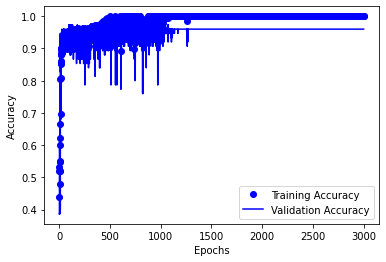

In [25]:
plot_train_vs_validation_accuracy(history)

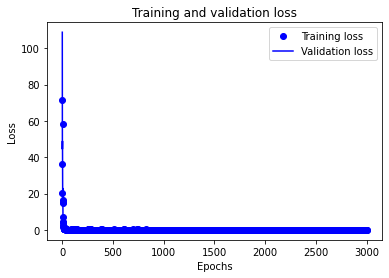

In [26]:
plot_train_vs_validation_loss(history)